In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_classification
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [3]:
X,y =make_classification(n_samples=5000, n_features=2, n_informative=2, n_classes=3, n_clusters_per_class=1,
                        n_redundant=0,n_repeated=0,weights=[0.01,0.05,0.94],class_sep=0.8,random_state=0)
print("Dados em cada uma das classes",sorted(Counter(y).items()))

Dados em cada uma das classes [(0, 64), (1, 262), (2, 4674)]


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [26]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', tree.DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))
models.append(('xgboost', xgboost.XGBClassifier()))
models.append(('random_forest', RandomForestClassifier()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

### K-fold cross validation

Esse metodo é útil para testar um modelo com diferentes divisões dos dados entre treino e teste. Inicialmente os dados são divididos randomicamente em k”folds”. Se temos k-fold=10, então temos 10 diferentes combinações de treino e teste para aplicar no modelo. A seguir, para cada um dos k-fold no banco de dados, construímos o modelo com os k-1 folds do banco de dados e testamos o modelo para ver a efetividade. Repetimos esses passos até completar todos os testes em todos os k-folds. A média dos resultados do erro de k que foram gravados é denominada de cross-validation error, e irá servir como a métrica de performance para o nosso modelo.

In [33]:
# evaluate each model in turn
import warnings
warnings.filterwarnings("ignore")
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971600 (0.007838)
LDA: 0.989400 (0.004200)
KNN: 0.988400 (0.003774)
CART: 0.982200 (0.006478)
NB: 0.938000 (0.007376)
SVM: 0.989000 (0.003715)
xgboost: 0.989000 (0.003924)
random_forest: 0.988200 (0.003400)


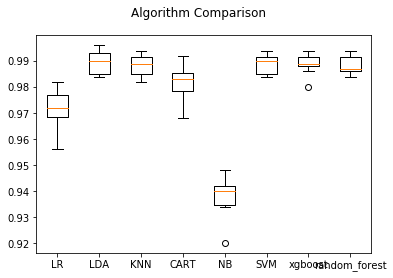

In [34]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## GridsearchCV e pipeline

In [5]:
pipe = Pipeline([('classifier', RandomForestClassifier())])
search_space = [{'classifier': [LogisticRegression()]},
                {'classifier': [LinearDiscriminantAnalysis()]},
                {'classifier': [svm.SVC()]},
                {'classifier': [xgboost.XGBClassifier()]},
                {'classifier': [RandomForestClassifier()]}]

Score para o melhor modelo 0.9888
[[   9    1    2]
 [   0   50    9]
 [   0    2 1177]]


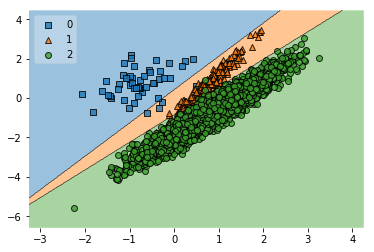

In [6]:
# Create grid search 
import warnings
warnings.filterwarnings("ignore")
clf = GridSearchCV(pipe, search_space, cv=10, verbose=0)
# Fit grid search
best_model = clf.fit(x_train, y_train)
# Predict target vector
y_pred=best_model.predict(x_test)
# View best model
best_parameters=best_model.best_estimator_.get_params()['classifier']
print("Score para o melhor modelo",best_model.score(x_test,y_test))
plot_decision_regions(X=X,y=y,clf=best_model,legend=2)
print(confusion_matrix(y_test,y_pred))

In [7]:
best_model

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)]}, {'cla...bs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start